# key words
- datasets: UCI breast-cancer-wisconsin
- model selection: train_test_split
- regressor: LogisticRegression
- metrics: accuracy_score, roc_curve, auc

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


data_address = os.path.join(os.getcwd(), "breast-cancer-wisconsin.csv")
column_names = ['radius',
                'texture',
                'perimeter',
                'area',
                'smoothness',
                'compactness',
                'concavity',
                'concave points',
                'symmetry',
                'malignant']
feature_names = column_names[:-1]
target_name = column_names[-1]

# load sample data
data = pd.read_csv(data_address , names=column_names)

# data pre-analysis
- first several lines and dtypes
- data preprocessing
- overview distribution and hist plot

In [2]:
# list first 5 rows of the data
data.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,malignant
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# list all dtypes
data.dtypes

radius             int64
texture            int64
perimeter          int64
area               int64
smoothness         int64
compactness       object
concavity          int64
concave points     int64
symmetry           int64
malignant          int64
dtype: object

In [4]:
# y_label distribution
# 2 - not having cancer; 4 - having cancer
data[target_name] = data[target_name].astype(np.int)
# 0 - not having cancer; 1 - having cancer
data[target_name] = np.where(data[target_name] == 2, 0, 1)
data[target_name].value_counts()

0    458
1    241
Name: malignant, dtype: int64

In [5]:
# overview distribution of the data
data.describe()

,radius,texture,perimeter,area,smoothness,concavity,concave points,symmetry,malignant
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AA3B940>,
      dtype=object)

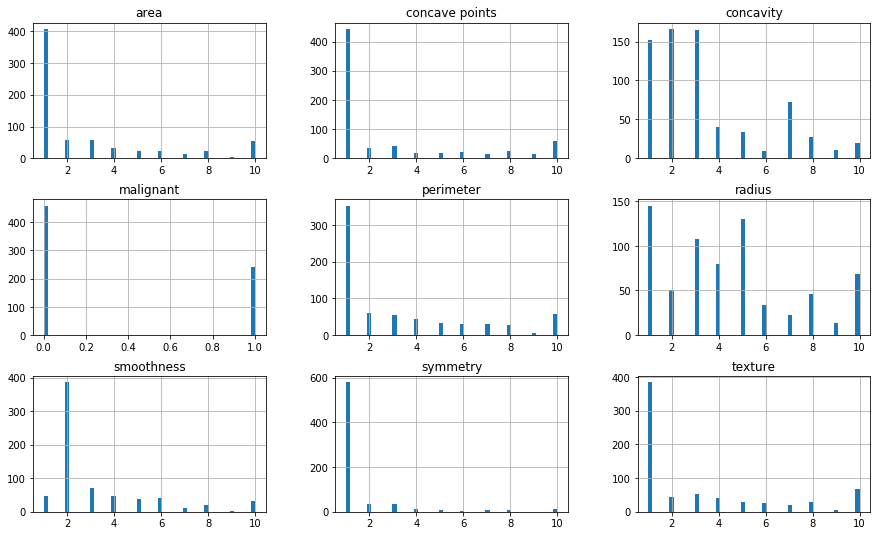

In [6]:
# data distribution of all features
data.hist(figsize=(15, 9), bins=50)

# model fitting and scoring
- choose model
- training
- scoring
- plotting

accuracy score = 0.950000


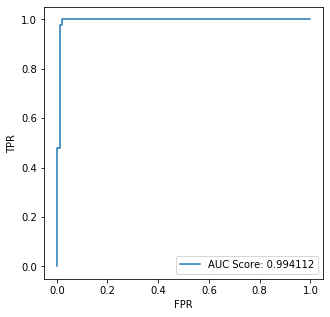

In [7]:
X = data[[col for col in feature_names if col != "compactness"]]
y = data[target_name]

# stratify=y makes the distribution of splitted dataset the same as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# logistic regression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# accuracy
acc_score = accuracy_score(y_test, y_pred)
print("accuracy score = %.6f" % acc_score)

# roc, auc
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)

# plotting
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label="AUC Score: %.6f" % auc_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')